## Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Objective 
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


**Data understanding**

In [2]:
# read the data

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Data Cleaning**

In [6]:
#Missing values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*no missing values in bike dataset*

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 *Drop duplicates*

In [8]:
bike.drop_duplicates(inplace=True)
bike.shape

(730, 16)

*drop unnecessary columns*

In [9]:
#instant: record index
bike.drop("instant", axis=1, inplace=True)

#dteday as we have columns year and month
bike.drop("dteday", axis=1, inplace=True)

#variable 'cnt' is a sum of casual and registered
bike.drop("casual", axis=1, inplace=True)
bike.drop("registered", axis=1, inplace=True)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Outliers**

In [11]:
numerical_cols =['temp','atemp','hum','windspeed','cnt']

----------temp----------


count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


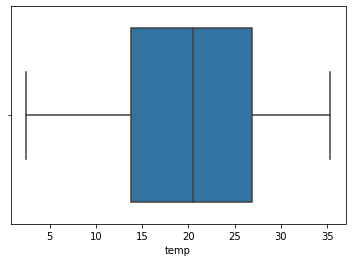

----------atemp----------


count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


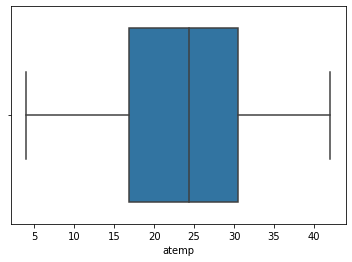

----------hum----------


count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


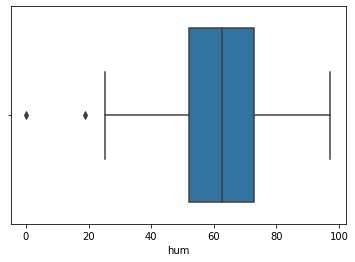

----------windspeed----------


count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


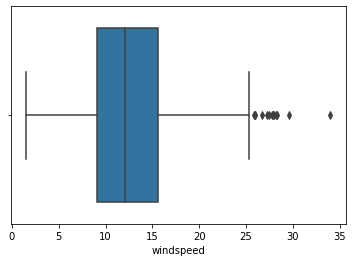

----------cnt----------


count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


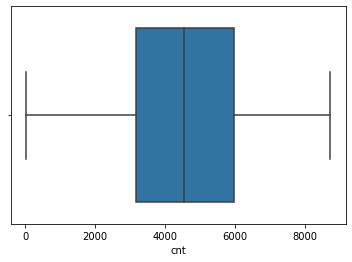

In [12]:
for i in numerical_cols:
    print('----------'+i+'----------')
    sns.boxplot(bike[i])
    print('\n')
    print(bike[i].describe())
    plt.show()

*There is huge difference in min value and 25th percentile*

In [13]:
print(bike['hum'].describe())
print('0.01 quantile:',bike['hum'].quantile(0.01))
print('0.02 quantile:',bike['hum'].quantile(0.02))

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64
0.01 quantile: 31.209592999999998
0.02 quantile: 35.755014


In [14]:
# drop values bike['hum'] < 31  == 7 records

bike = bike[bike['hum'] > 31]

In [15]:
bike.shape

(723, 12)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
cat_variables = ['season','yr','mnth','weekday','workingday','weathersit','holiday']

*Mapping categorical variables to actual values for better understanding*

In [18]:
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['yr'] = bike['yr'].map({0:'2018',1:'2019'})
bike['workingday'] = bike['workingday'].map({0:'no holiday',1:'holiday'})
bike['mnth'] = bike['mnth'].map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"})
bike['weekday'] = bike['weekday'].map({0:"sun",1:"mon",2:"tues",3:"wed",4:"thu",5:"fri",6:"sat"})
bike['weathersit'] = bike['weathersit'].map({1:"clear",2:"misty",3:"lightSnow",4:"heavySnow"})

*visualizing categorical variables*

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

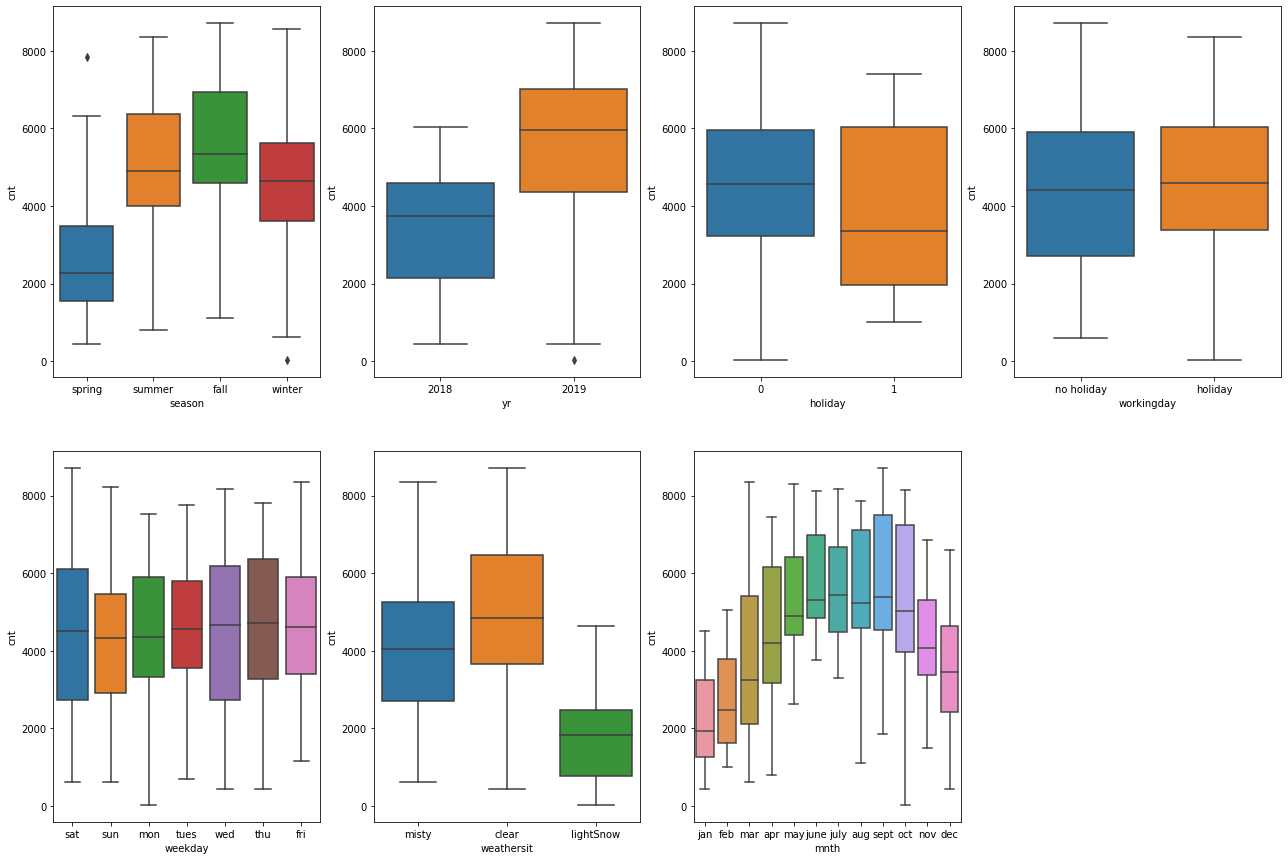

In [19]:
plt.figure(figsize=(22,15))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike)

plt.subplot(2,4,3)
sns.boxplot(x='holiday',y='cnt',data=bike)

plt.subplot(2,4,4)
sns.boxplot(x='workingday',y='cnt',data=bike)

plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.subplot(2,4,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)

plt.subplot(2,4,7)
sns.boxplot(x='mnth',y='cnt',data=bike)


*visualize the numerical variables*

<Figure size 1440x1080 with 0 Axes>

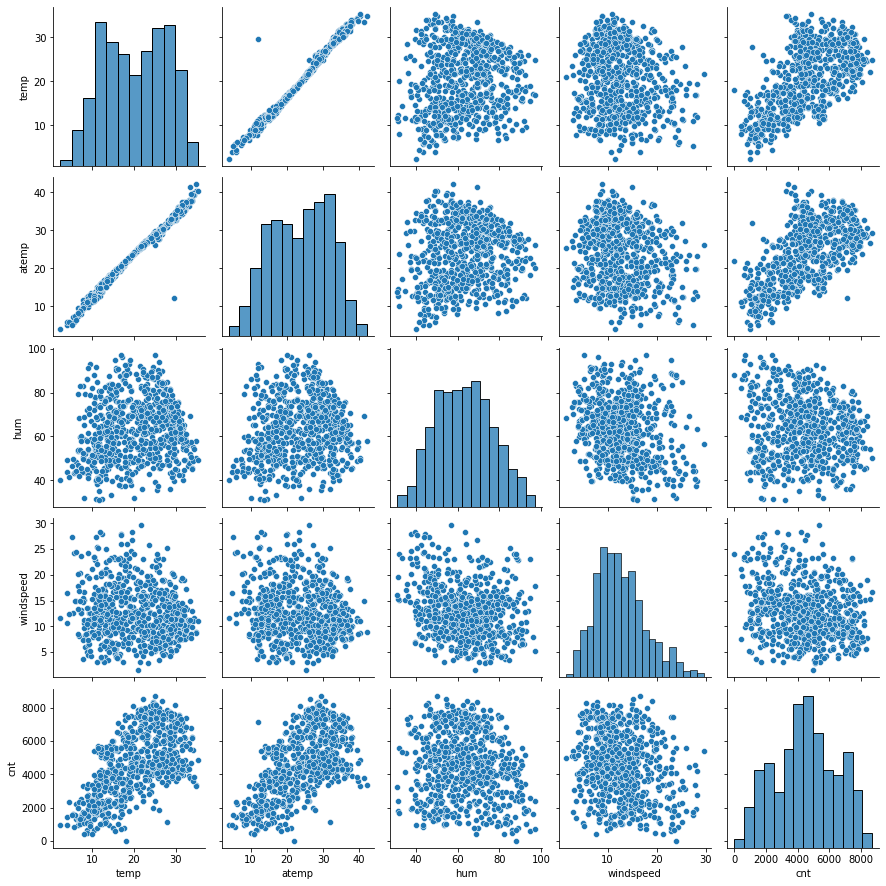

In [20]:
plt.figure(figsize=(20,15))
sns.pairplot(data=bike,vars=numerical_cols)
plt.show()

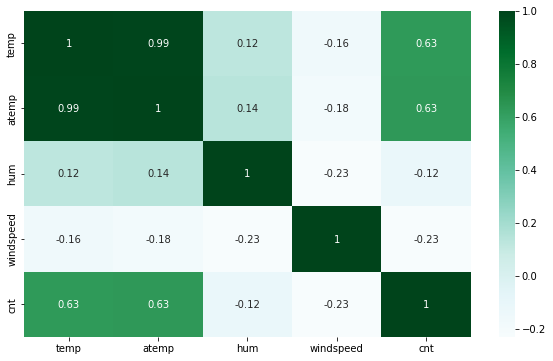

In [21]:
plt.figure(figsize = (10,6))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

*visualize the numerical data with target variable*

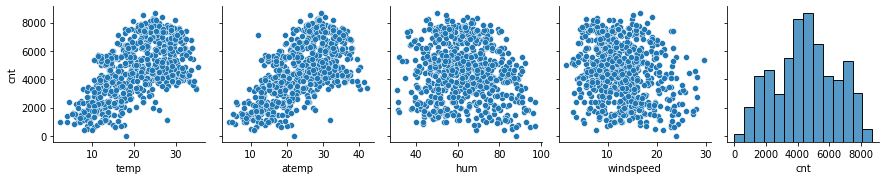

In [22]:
sns.pairplot(data=bike,x_vars=numerical_cols,y_vars='cnt')

#### Conclusion : 
1. temp and atemp are highly co-related with each other
2. temp and atemp has the highest corelation with the target variable cnt compared to other variables

### Preparing data for modeling

In [23]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,no holiday,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,no holiday,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,holiday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tues,holiday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,holiday,clear,9.305237,11.46350,43.6957,12.522300,1600


**Handling categorical variables**

In [24]:
bike['yr'] = bike['yr'].map({'2018':0,'2019':1})
bike['workingday'] = bike['workingday'].map({'no holiday':0,'holiday':1})

In [25]:
bike.shape

(723, 12)

**Dummy variables**

In [26]:
bike = pd.get_dummies(bike, columns=['season','mnth','weathersit','weekday'], drop_first=True)

In [27]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_lightSnow,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
bike.shape

(723, 30)

## Model Building

### Splitting into train and test

In [29]:
np.random.seed(0)
df_train,df_test = train_test_split(bike,train_size=0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)

(506, 30)
(217, 30)


### Rescaling

In [30]:
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']


# Fit on train data 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_lightSnow,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed
530,1,0,1,0.722754,29.98770,0.420919,0.367929,0.879314,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
330,0,0,0,0.498465,22.79000,0.585381,0.445074,0.350782,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
451,1,0,1,0.529616,23.54750,0.257089,0.642409,0.653014,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
107,0,0,1,0.564921,25.15730,0.349716,0.336796,0.391970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
117,0,0,1,0.695756,28.94645,0.589161,0.712158,0.464335,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [31]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,506.000000,506.000000,506.000000,506.000000
mean,0.551607,0.484494,0.399461,0.526867
std,0.225244,0.203406,0.182764,0.223777
min,0.000000,0.000000,0.000000,0.000000
25%,0.356208,0.326875,0.268528,0.378624
50%,0.563882,0.488027,0.373142,0.525943
75%,0.743261,0.631222,0.509987,0.700040
max,1.000000,1.000000,1.000000,1.000000


In [32]:
#X_train,y_train

y_train = df_train.pop('cnt')
X_train = df_train

#### Eliminating insignificant columns with automated approach

In [33]:
#Running RFE to understand significance of the feature

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weathersit_lightSnow', True, 1),
 ('weathersit_misty', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 4),
 ('weekday_tues', False, 3),
 ('weekday_wed', False, 5)]

In [35]:
rfe_col = X_train.columns[rfe.support_]

In [36]:
#significant columns selected by rfe
rfe_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_mar', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun'],
      dtype='object')

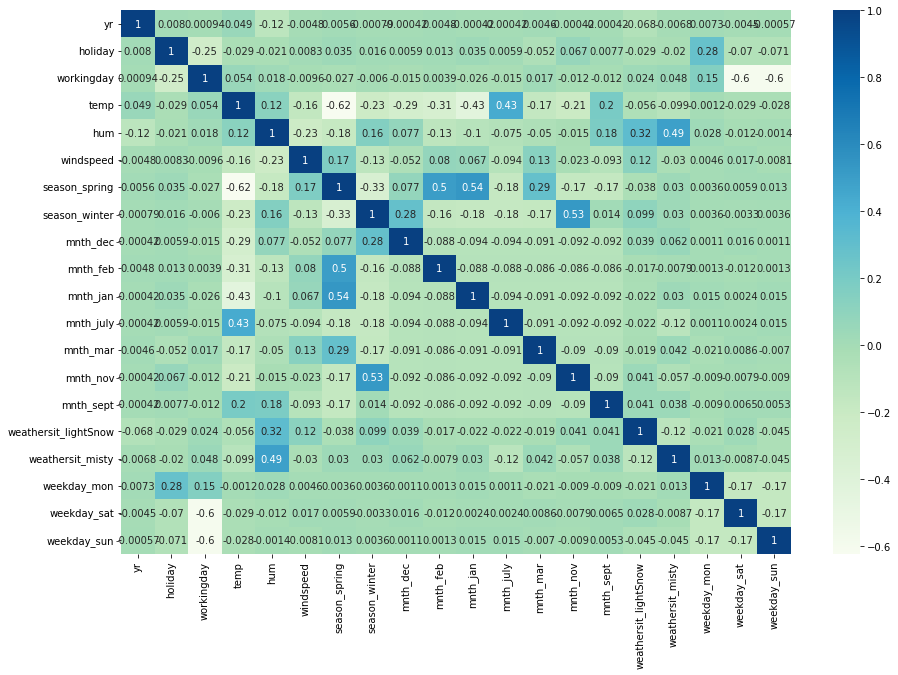

In [37]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_mar', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun']].corr(), cmap='GnBu', annot=True)
plt.show()

In [38]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [39]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 530 to 105
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    506 non-null    int64  
 1   holiday               506 non-null    int64  
 2   workingday            506 non-null    int64  
 3   temp                  506 non-null    float64
 4   hum                   506 non-null    float64
 5   windspeed             506 non-null    float64
 6   season_spring         506 non-null    uint8  
 7   season_winter         506 non-null    uint8  
 8   mnth_dec              506 non-null    uint8  
 9   mnth_feb              506 non-null    uint8  
 10  mnth_jan              506 non-null    uint8  
 11  mnth_july             506 non-null    uint8  
 12  mnth_mar              506 non-null    uint8  
 13  mnth_nov              506 non-null    uint8  
 14  mnth_sept             506 non-null    uint8  
 15  weathersit_lightSnow 

#### Eliminating insignificant columns with manual approach

*Create functions for model creation using statsmodel library and calculating VIFs*

In [40]:
def model_creation(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr_model = sm.OLS(y_train,X_train_sm).fit()
    print(lr_model.summary())
    return lr_model

def VIF_creation(cols):
    X_train_ = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train_.columns
    vif['VIF']=[variance_inflation_factor(X_train_.values,i) for i in range(X_train_.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif.sort_values(by="VIF",ascending=False)
    print(vif)

**Model 1**

In [41]:
print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_mar', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun'],
      dtype='object')


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          8.45e-189
Time:                        19:14:10   Log-Likelihood:                 526.15
No. Observations:                 506   AIC:                            -1012.
Df Residuals:                     486   BIC:                            -927.8
Df Model:                   

##### Conclusion : drop variable mnth_mar as it has p-value = 0.255  viz greater than significance value 0.05

**Model 2**

In [42]:
rfe_col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sat', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     157.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.26e-189
Time:                        19:14:12   Log-Likelihood:                 525.47
No. Observations:                 506   AIC:                            -1013.
Df Residuals:                     487   BIC:                            -932.6
Df Model:                          18                                         
Covariance Type:  

##### Conclusion : drop variable workingday as it has vif = 37.54  viz greater than 5

**Model 3**

In [43]:
rfe_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sat', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     157.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.26e-189
Time:                        19:14:14   Log-Likelihood:                 525.47
No. Observations:                 506   AIC:                            -1013.
Df Residuals:                     487   BIC:                            -932.6
Df Model:                          18                                         
Covariance Type:            nonr

##### Conclusion : drop variable weekday_sat as it has p-value = 0.804 viz greater than significance value 0.05

**Model 4**

In [44]:
rfe_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon','weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          9.93e-191
Time:                        19:14:15   Log-Likelihood:                 525.44
No. Observations:                 506   AIC:                            -1015.
Df Residuals:                     488   BIC:                            -938.8
Df Model:                          17                                         
Covariance Type:            nonrobust          

##### Conclusion : drop variable hum as it has vif = 13.29  viz greater than 5

**Model 5**

In [45]:
rfe_col = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon','weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.77e-187
Time:                        19:14:17   Log-Likelihood:                 514.94
No. Observations:                 506   AIC:                            -995.9
Df Residuals:                     489   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                 

##### Conclusion : drop variable temp as it has vif = 5.82  viz greater than 5

**Model 6**

In [46]:
rfe_col = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon','weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     145.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.40e-169
Time:                        19:14:18   Log-Likelihood:                 469.45
No. Observations:                 506   AIC:                            -906.9
Df Residuals:                     490   BIC:                            -839.3
Df Model:                          15                                         
Covariance Type:            nonrobust                         

##### Conclusion : After dropping feature temp we can see a drop in r-squared and adjusted r-squared, so we can conclude that  temp might be a significant feature for our anaylsis.
##### Adding feature temp and dropping feature windspeed with second highest vif=5.07

**Model 7**

In [47]:
rfe_col = ['yr', 'holiday', 'temp','season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept','weathersit_lightSnow', 'weathersit_misty', 'weekday_mon','weekday_sun']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty', 'weekday_mon', 'weekday_sun']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.08e-183
Time:                        19:14:19   Log-Likelihood:                 503.19
No. Observations:                 506   AIC:                            -974.4
Df Residuals:                     490   BIC:                            -906.8
Df Model:                          15                                         
Covariance Type:            nonrobust                              

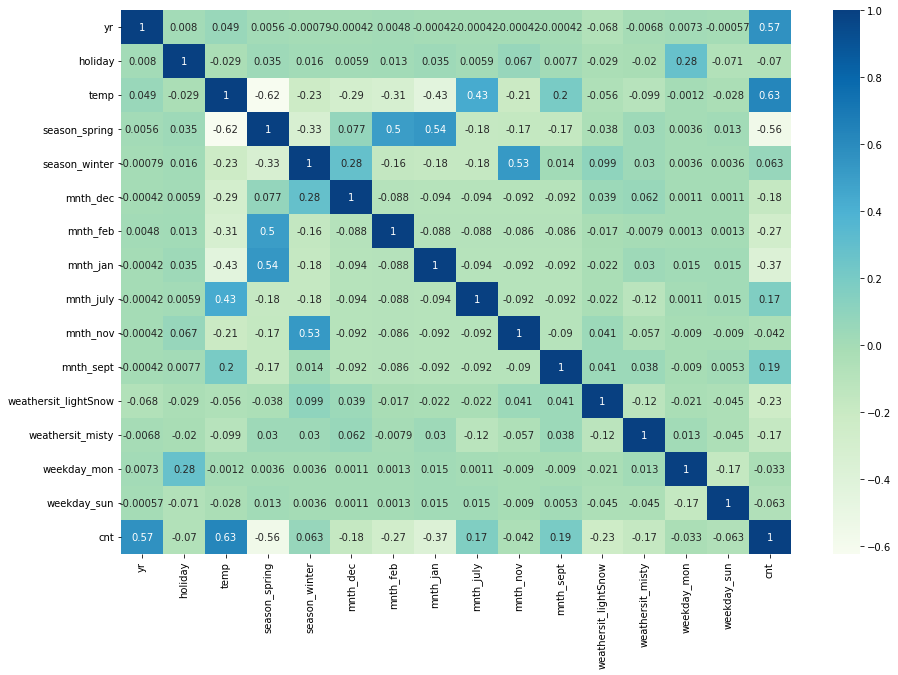

In [48]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'temp','season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept','weathersit_lightSnow', 'weathersit_misty', 'weekday_mon','weekday_sun','cnt']].corr(), cmap='GnBu', annot=True)
plt.show()

##### Conclusion : Dropping features weekday_sun (0.063) and weekday_mon(0.033) as it has least correlation with target variable and check if it affects adjusted r-squared value

**Model 8**

In [49]:
rfe_col = ['yr', 'holiday', 'temp','season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept','weathersit_lightSnow', 'weathersit_misty']

print('features: \n',rfe_col)
print('\n')
model_creation(rfe_col)
VIF_creation(rfe_col)

features: 
 ['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_lightSnow', 'weathersit_misty']


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.00e-181
Time:                        19:14:22   Log-Likelihood:                 492.33
No. Observations:                 506   AIC:                            -956.7
Df Residuals:                     492   BIC:                            -897.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  

##### Conclusion : After dropping weekday_sun and weekday_mon we can slight drop in adjusted r-squared value

#### Conclusion : 
- At this stage,no features have value p-value greater than significance value 0.05.
- VIF values for all predictors are less than 5.
- R-squared 0.833 is and Adjusted r-squared is 0.828.Which is a good score.
- Prob (F-statistic): 2.00e-181

In [50]:
rfe_col = ['yr', 'holiday', 'temp','season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept','weathersit_lightSnow', 'weathersit_misty']

lr_final = LinearRegression()
lr_final.fit(X_train[rfe_col],y_train)
print(lr_final.coef_)

[ 0.23956658 -0.05886715  0.37830054 -0.10453853  0.08167799 -0.08687697
 -0.04975802 -0.06544439 -0.04601842 -0.0860835   0.04646566 -0.3070463
 -0.08085412]


## Model Evaluation

### Residual Analysis

In [51]:
#predicted values of y

y_train_pred = lr_final.predict(X_train[rfe_col])

In [52]:
res =  y_train - y_train_pred

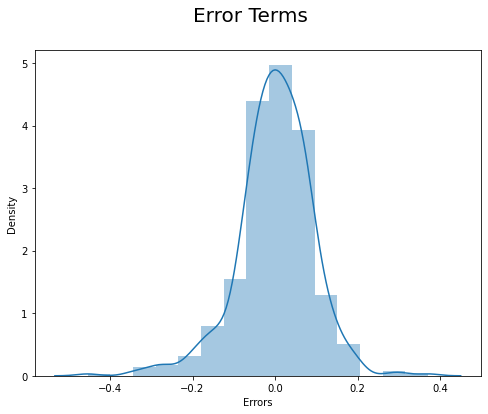

In [53]:
fig = plt.figure(figsize = (8,6))
sns.distplot((res), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

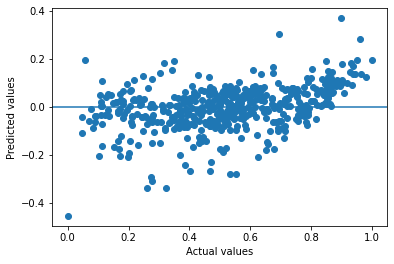

In [54]:
plt.scatter(y_train,res)
plt.axhline(0)
fig.suptitle('Actual vs Predicted', fontsize = 12)             
plt.xlabel('Actual values', fontsize = 10)                          
plt.ylabel('Predicted values', fontsize = 10)   
plt.show()

### Predictions

In [55]:
num_vars = ['temp','hum','windspeed','cnt']

# Transform on test data 
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_lightSnow,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed
340,0,0,1,0.437201,20.01230,0.996850,0.581584,0.078578,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
524,1,0,0,0.812053,32.41835,0.190296,0.290801,0.860101,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
605,1,0,1,0.779864,31.78665,0.364209,0.215116,0.882996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33,0,0,1,0.159278,8.89390,0.191419,0.609203,0.175794,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
443,1,0,1,0.625146,26.92665,0.751103,0.235892,0.698458,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [56]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_lightSnow,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed
count,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.474654,0.023041,0.709677,0.528300,23.16353,0.483854,0.397786,0.493762,0.267281,0.239631,0.244240,0.115207,0.087558,0.082949,0.078341,0.055300,0.092166,0.133641,0.069124,0.096774,0.064516,0.069124,0.027650,0.387097,0.147465,0.142857,0.124424,0.129032,0.156682,0.161290
std,0.500512,0.150382,0.454961,0.235682,8.42649,0.217217,0.184679,0.217671,0.443564,0.427845,0.430629,0.320010,0.283304,0.276443,0.269329,0.229092,0.289929,0.341052,0.254252,0.296334,0.246238,0.254252,0.164346,0.488212,0.355389,0.350736,0.330828,0.336011,0.364341,0.368649
min,0.000000,0.000000,0.000000,0.047675,5.89650,0.004411,0.072713,0.067073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.330249,16.19335,0.305608,0.264112,0.309250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.502618,22.82000,0.473850,0.384240,0.496088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,30.39875,0.642091,0.486635,0.640014,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,42.04480,0.996850,0.952475,0.913829,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

**Predictions with test data**

In [58]:
X_test_new = X_test[rfe_col]
y_test_pred = lr_final.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

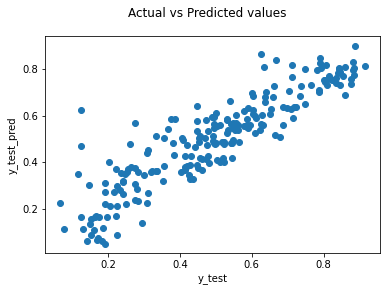

In [59]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted values', fontsize = 12)              
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_test_pred', fontsize = 10)  

In [60]:
print("R - squared value for train set : ",r2_score(y_train,y_train_pred))
print("R - squared value for test set : ",r2_score(y_test,y_test_pred))

R - squared value for train set :  0.8326467748647389
R - squared value for test set :  0.8046746598708968


#### R - squared value for train set (83.26%) and test set (80.46%) are comparatively good. 

In [61]:
r2_score(y_test,y_test_pred)

0.8046746598708968

## Conclusion -

### Following are coefficient values for significant features
- intercept : 0.2603182288964753
- yr: 0.23956658
- holiday: -0.05886715
- temp: 0.37830054
- season_spring: -0.10453853
- season_winter: 0.08167799
- mnth_dec: -0.08687697
- mnth_feb: -0.04975802
- mnth_jan: -0.06544439
- mnth_july: -0.04601842
- mnth_nov: -0.0860835
- mnth_sept: 0.04646566
- weathersit_lightSnow: -0.3070463
- weathersit_misty: -0.08085412

### List of significant features to predict the demand for shared bikes are :
1. Season (Spring, Winter)
2. Weather (Light Snow, Misty)
3. Month (January, February, July, September, November, December)
4. Temperature
5. Holiday
6. Year